In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from skimage import io, color

# Load the microstructure image
image = io.imread('/Users/maniksinghsarmaal/Downloads/sem6/Eutectic:Non-eutectic/Dataset/train/Eutectic/fmats-07-567793-g001 4.jpg')

#handling case of grey image into pseudo rgb converteer
rgb_image = np.stack((image,) * 3, axis=-1)
# Convert the image to grayscale
gray_image = color.rgb2gray(rgb_image)

# Flatten the image into a 1D array
flattened_image = gray_image.flatten().reshape(-1, 1)

# Normalize pixel values
normalized_image = (flattened_image - np.min(flattened_image)) / (np.max(flattened_image) - np.min(flattened_image))

# Subsample the data (select a random subset of samples)
np.random.seed(42)
subsample_indices = np.random.choice(normalized_image.shape[0], size=min(50000, normalized_image.shape[0]), replace=False)
subsample_data = normalized_image[subsample_indices]

# Determine the optimal number of clusters using the elbow method
def find_optimal_clusters(data, max_clusters=10):
    distortions = []
    silhouette_scores = []
    for i in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    return distortions, silhouette_scores

distortions, silhouette_scores = find_optimal_clusters(subsample_data, max_clusters=10)
# Plot both the elbow method graph and silhouette score plot
plt.figure(figsize=(12, 5))

# Elbow method graph
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


KeyboardInterrupt: 

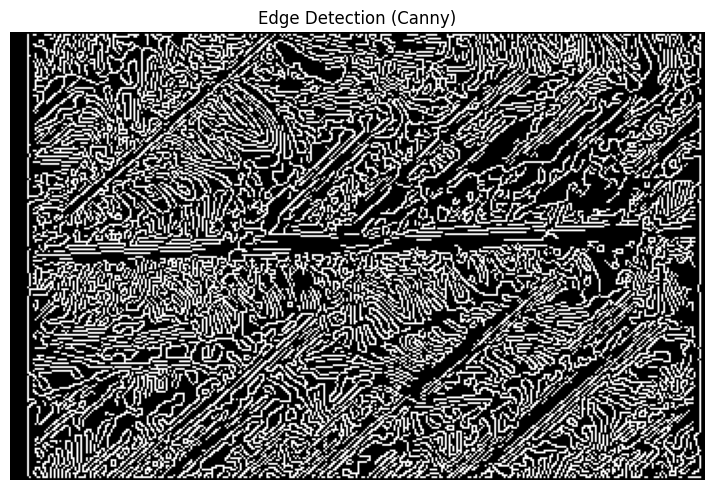

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature

# Load the microstructure image

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Step 1: Edge Detection using Canny edge detection
edges = feature.canny(gray_image, sigma=1)

# Display results
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.imshow(edges, cmap='gray')
ax.set_title('Edge Detection (Canny)')
ax.axis('off')

plt.tight_layout()
plt.show()


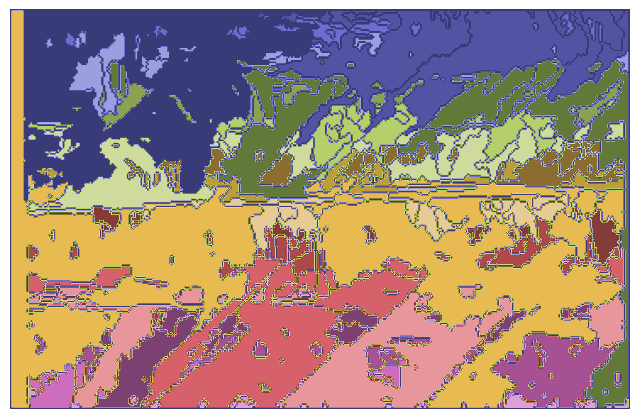

Number of phases: 506


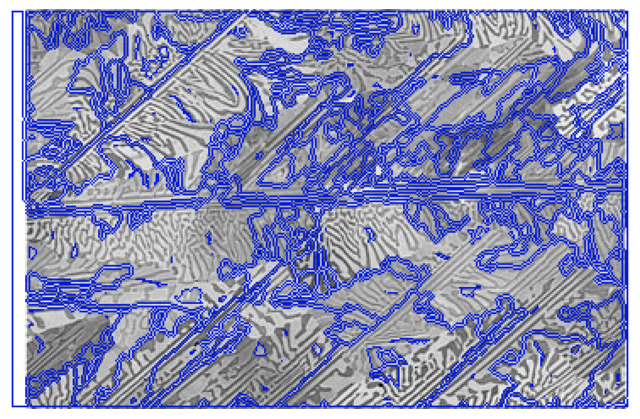

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io, color, feature

# Load the microstructure image
img = image

# Convert the image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Step 1: Edge Detection using Canny edge detection
edges = feature.canny(gray_image, sigma=1)

# Step 2: Watershed Segmentation
# Apply watershed segmentation on the edge-detected image
markers = cv2.connectedComponents(np.uint8(edges))[1]
markers = cv2.watershed(img, markers)

# Step 3: Visualization
# Visualize the segmented regions
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

# Count the number of phases (excluding background label 0)
num_phases = len(np.unique(markers)) - 1
print("Number of phases:", num_phases)

# Extract individual segmented regions and draw their contours on the original image
labels = np.unique(markers)
coins = []
for label in labels[1:]:
    target = np.where(markers == label, 255, 0).astype(np.uint8)
    contours, hierarchy = cv2.findContours(target, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    coins.append(contours[0])

# Draw the contours on the original image
for contour in coins:
    img = cv2.drawContours(img, [contour], -1, color=(0, 23, 223), thickness=1)

# Display the final image with contours
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.show()


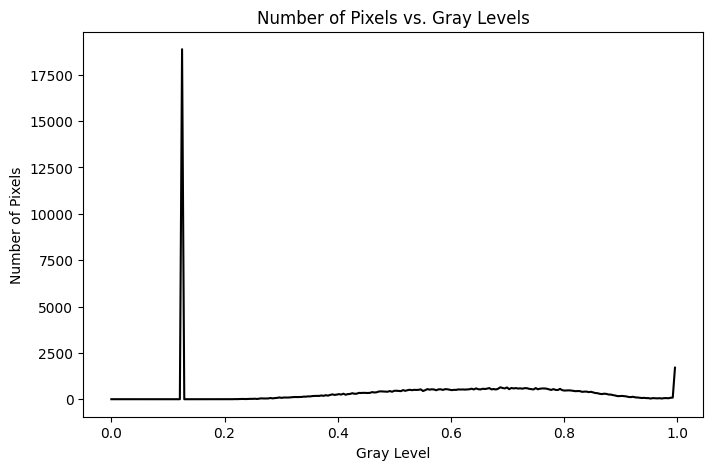

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from sklearn.cluster import KMeans

# Load the microstructure image
#image = io.imread('/Users/maniksinghsarmaal/Downloads/sem6/Eutectic:Non-eutectic/Dataset/train/Eutectic/000006.jpgg')

# Convert the image to grayscale and normalize pixel values
gray_image = color.rgb2gray(image)

# Calculate the histogram of pixel intensities
hist, bins = np.histogram(gray_image.ravel(), bins=256, range=(0,1))

# Plot the number of pixels (voxels) versus gray levels
plt.figure(figsize=(8, 5))
plt.plot(bins[:-1], hist, color='black')
plt.title('Number of Pixels vs. Gray Levels')
plt.xlabel('Gray Level')
plt.ylabel('Number of Pixels')
plt.show()

In [12]:
# Load the microstructure image
#image = io.imread('/Users/maniksinghsarmaal/Downloads/sem6/Eutectic:Non-eutectic/Dataset/train/Eutectic/crat201900108-fig-0003-m.jpg')

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Flatten the image into a 1D array
flattened_image = gray_image.flatten().reshape(-1, 1)

# Normalize pixel values
normalized_image = (flattened_image - np.min(flattened_image)) / (np.max(flattened_image) - np.min(flattened_image))

Area fraction of phase 0: 72.36%
Area fraction of phase 1: 27.64%


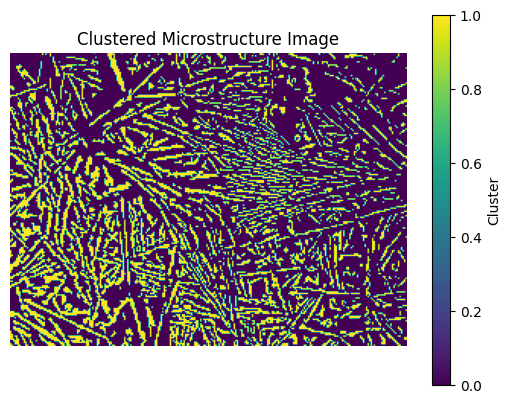

In [6]:
# Based on the elbow method, choose the number of clusters
num_clusters = 2
# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
kmeans.fit(normalized_image)

# Assign labels to each pixel
cluster_labels = kmeans.labels_

# Reshape the cluster labels to the shape of the original image
clustered_image = cluster_labels.reshape(gray_image.shape)
area_fractions = []
total_pixels = clustered_image.size
for cluster in range(num_clusters):
    cluster_pixels = np.sum(clustered_image == cluster)
    area_fraction = cluster_pixels / total_pixels
    area_fractions.append(area_fraction)

# Print the area fraction of each phase
for i, area_fraction in enumerate(area_fractions):
    print(f"Area fraction of phase {i}: {area_fraction:.2%}")
# Plot the clustered image
plt.imshow(clustered_image, cmap='viridis')
plt.title('Clustered Microstructure Image')
plt.axis('off')
plt.colorbar(label='Cluster')
plt.show()